# The Sparks Foundation - Task 3

### Decision Trees

In [1]:
__author__ = "Mrunal Salvi"
__email__ = "mrunalsalvi94@gmail.com"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [3]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df = df.drop('Id',1)

In [5]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from IPython.display import Image
import pydotplus

In [7]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state = 6)

[Text(167.4, 199.32, 'X[3] <= 0.8\ngini = 0.667\nsamples = 120\nvalue = [41, 40, 39]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 79\nvalue = [0, 40, 39]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 5.05\ngini = 0.133\nsamples = 42\nvalue = [0, 39, 3]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.05\nsamples = 39\nvalue = [0, 38, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'X[2] <= 4.75\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(51.50769230769231, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(103.01538461538462, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(154.52307692307693, 90.6, 'X[0] <= 6.15\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(128.7692307692

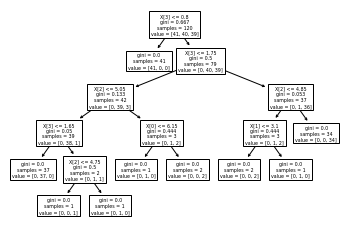

In [8]:
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt.predict(X_test)

tree.plot_tree(dt)

### Checking the training and testing scores

In [9]:
dt_score_train = dt.score(X_train,y_train)
print('Training Data score:',dt_score_train)

dt_score_test = dt.score(X_test,y_test)
print('Testing Data score:',dt_score_test)

Training Data score: 1.0
Testing Data score: 0.9333333333333333


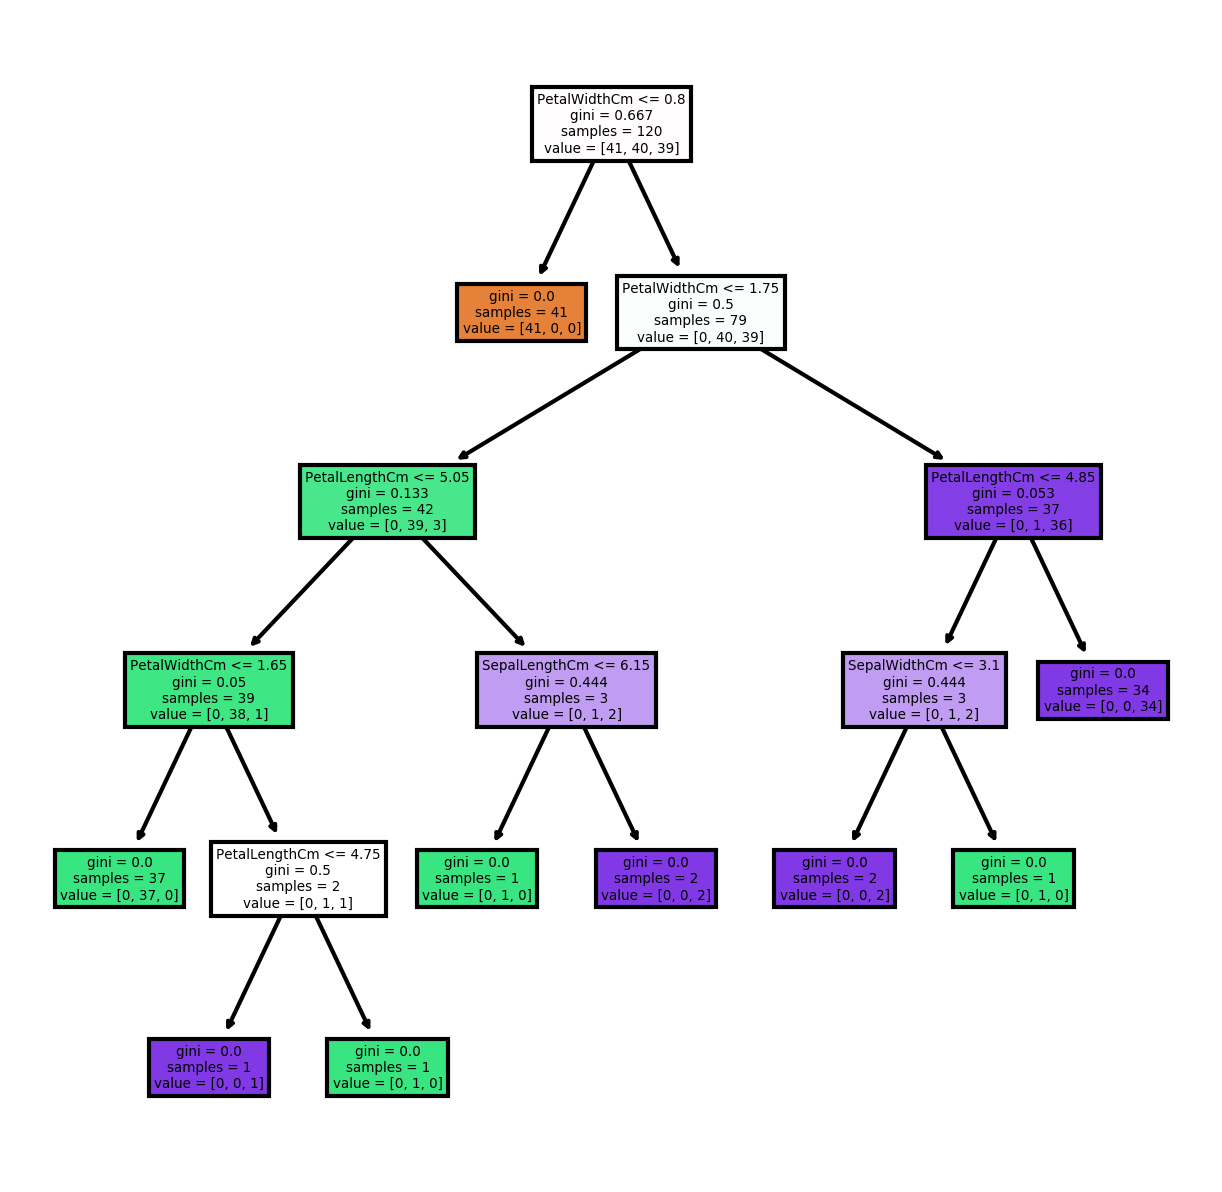

In [10]:
fn = list(X.columns)

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)

tree.plot_tree(dt,feature_names = fn,filled = True)

fig.savefig('DT.png')

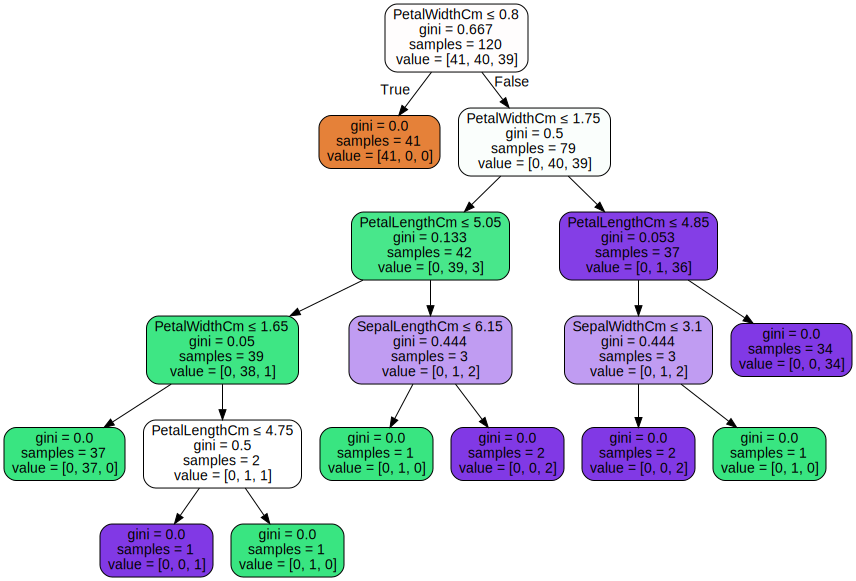

In [11]:
import graphviz

dot_data = tree.export_graphviz(dt, out_file=None, feature_names=X.columns, rounded=True, filled=True,special_characters=True)
graph = graphviz.Source(dot_data)
graph